<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/M%C3%A9todo_de_colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue;">MÉTODO DE COLOCACIÓN</span>


<span style="color:blue;"> Método de colocación para una EDO</span>
Consideramos el problema
$$
\frac{d^2 u}{dx^2}+ u =-x
$$
con las condiciones iniciales
$$u(0)=0\\ u(1)=0$$

Este método es *heurístico* y consiste en proponer una solución de la forma:

$$
u_N=∑_{i=1} ^N α_1 β_1(x)+α_2 β_2(x)+..+α_N β_N(x)
$$

Donde los $β_i$ son llamadas las **funciones base.**
Por ejemplo:
$$
β_1 ^{(x)}=x(1-x)\\
β_2 ^{(x)}=x^2(1-x)\\
β_3 ^{(x)}=x^3(1-x)\\
.\\
.\\
.\\
β_N ^{(x)}=x^N(1-x)
$$

El obejtivo es determinar los coeficientes $α_i$ para una elección particular de funciones base.

Una medida de la aproximación de la solución $u_N$ es a través del error
<span style="color:purple;">
$$
E=\frac{d^2 u_N}{dx^2}+ u_N + x$$</span>

<span style="color:magenta;">Ejercicio:</span>

Considere el problema de valor inicial $ u'' + u = x $ con condiciones $u(0) = 0 $ y $ u'(0) = 2 $. Encuentre una solución aproximada de la forma  
$$
u_N = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots
$$

* Elija $\alpha_0$ y $\alpha_1 $ para satisfacer las condiciones dadas.

* Defina $ \epsilon = u_N'' + u_N - x $, y encuentre $ \epsilon $ en este caso.

Restringiendo $ u_N$ a un polinomio cúbico, use $ x = \frac{1}{2} $ y $x = 1 $ como puntos de colocación para encontrar una solución aproximada.
<span style="color:blue;">  </span>

Resolviendo tenemos que:

Determinamos $\alpha_0$ y $\alpha_1$ por condiciones iniciales:

De $u(0) = 0$:
$$
u_N(0) = \alpha_0 = 0 \quad \Rightarrow \quad \boxed{\alpha_0 = 0}
$$

Derivada:
$$
u_N'(x) = \alpha_1 + 2\alpha_2 x + 3\alpha_3 x^2 + \cdots
$$
De $u'(0) = 2$:
$$
u_N'(0) = \alpha_1 = 2 \quad \Rightarrow \quad \boxed{\alpha_1 = 2}
$$

* Definir $\epsilon = u_N'' + u_N - x$

Calculamos derivadas:
$$
\begin{align*}
u_N' &= 2 + 2\alpha_2 x + 3\alpha_3 x^2 + \cdots \\
u_N'' &= 2\alpha_2 + 6\alpha_3 x + 12\alpha_4 x^2 + \cdots
\end{align*}
$$
Entonces:
$$
\begin{align*}
\epsilon &= u_N'' + u_N - x \\
&= [2\alpha_2 + 6\alpha_3 x + 12\alpha_4 x^2 + \cdots] + [2x + \alpha_2 x^2 + \alpha_3 x^3 + \cdots] - x \\
&= 2\alpha_2 + (6\alpha_3 + 1)x + (12\alpha_4 + \alpha_2)x^2 + (20\alpha_5 + \alpha_3)x^3 + \cdots
\end{align*}
$$
* Aproximación cúbica ($\alpha_4 = \alpha_5 = \cdots = 0$)

Tomamos:
$$
u_N = 2x + \alpha_2 x^2 + \alpha_3 x^3
$$
El residual para este caso es:
$$
\boxed{\epsilon = 2\alpha_2 + (6\alpha_3 + 1)x + \alpha_2 x^2 + \alpha_3 x^3}
$$

* Colocación en $x = 1/2$ y $x = 1$

Imponemos $\epsilon = 0$ en ambos puntos.

* En $x = 1/2$:
$$
2\alpha_2 + (6\alpha_3 + 1)\cdot\frac12 + \alpha_2\cdot\frac14 + \alpha_3\cdot\frac18 = 0
$$
 Multiplicando por 8:
 $$
  16\alpha_2 + 4(6\alpha_3 + 1) + 2\alpha_2 + \alpha_3 = 0
$$
$$
\boxed{18\alpha_2 + 25\alpha_3 + 4 = 0} \quad \text{(1)}
$$

* En $x = 1$:
$$
2\alpha_2 + (6\alpha_3 + 1)\cdot 1 + \alpha_2\cdot 1 + \alpha_3\cdot 1 = 0
$$
$$
\boxed{3\alpha_2 + 7\alpha_3 + 1 = 0} \quad \text{(2)}
$$

* Solución del sistema

De (2): $\alpha_2 = \dfrac{-7\alpha_3 - 1}{3}$

Sustituyendo en (1):
$$
18\left(\frac{-7\alpha_3 - 1}{3}\right) + 25\alpha_3 + 4 = 0
$$
$$
-42\alpha_3 - 6 + 25\alpha_3 + 4 = 0
$$
$$
-17\alpha_3 - 2 = 0 \quad \Rightarrow \quad \alpha_3 = -\frac{2}{17}
$$

Luego:
$$
\alpha_2 = \frac{-7(-\frac{2}{17}) - 1}{3} = \frac{\frac{14}{17} - 1}{3} = -\frac{1}{17}
$$
* Solución aproximada final
$$
\boxed{u_N(x) = 2x - \frac{1}{17}x^2 - \frac{2}{17}x^3}
$$
O factorizando $\frac{1}{17}$:
$$
u_N(x) = \frac{1}{17}(34x - x^2 - 2x^3)
$$

Solución aproximada cúbica con los puntos $x = 1/2$ y $x = 1$.

Analíticamente:


In [89]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [90]:
x=sp.symbols('x') #introducimos variable
u=sp.Function('u') #esta es una función

In [91]:
# EDO: u'' + u = x
ode= u(x).diff(x,x) +u(x) - x #  Nota: u'' + u = x => u'' + u - x = 0
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [92]:
# Resolver con condiciones iniciales: u(0)=0, u'(0)=2
sol_exacta = sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x, 0): 2})

In [93]:
print("Solución exacta del problema original:")
sol_exacta

Solución exacta del problema original:


Eq(u(x), x + sin(x))

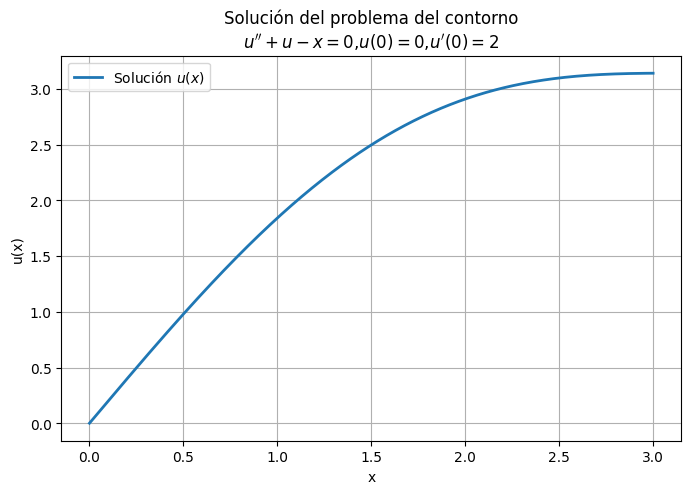

In [94]:
# Convertir a función numérica
u_exact_expr = sol_exacta.rhs
u_exact_num = sp.lambdify(x, u_exact_expr, "numpy") #numpy se usa para volver en un arreglo
##################
xx=np.linspace(0,3,500) #eje x de 0 a 3
yy=u_exact_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx,yy,label="Solución $u(x)$",linewidth=2)
plt.title("Solución del problema del contorno\n$u''+u-x=0$,$u(0)=0$,$u'(0)=2$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

Ahora con las funciones de prueba de $\frac{1}{2}$ y $1$

In [95]:
a,b= sp.symbols('a b') # son los a_0 y a_1
# Función de prueba: u_N = α₀ + α₁x + α₂x² + α₃x³
# Con α₀=0, α₁=2 ya determinados por condiciones iniciales
# Así que: u_N = 2x + a*x² + b*x³
u_n= 2*x + a*x**2 + b*x**3

In [96]:
print("\nFunción de prueba (cúbica):")
u_n


Función de prueba (cúbica):


a*x**2 + b*x**3 + 2*x

Calculamos la segunda derivada para la función de prueba

In [97]:
u_n_2 = sp.diff(u_n, x, 2)
#derivada
# Residual: ε = u_N'' + u_N - x
F = u_n_2 + u_n - x  # u_N'' + u_N - x

In [98]:
F # podemos omitir la derivada no es necesaria

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

In [99]:
# Puntos de colocación x=1/2 y x=1
points = [sp.Rational(1, 2), 1]

In [100]:
points

[1/2, 1]

In [101]:
# Crear ecuaciones: ε(x) = 0 en cada punto
eqs = [sp.Eq(F.subs(x, p), 0) for p in points]
# Resolver para a y b
sol_1=sp.solve(eqs,[a,b])

Resolvemos el sistema de ecuaciones

In [102]:
for eq in eqs:
  print(eq)

Eq(9*a/4 + 25*b/8 + 1/2, 0)
Eq(3*a + 7*b + 1, 0)


In [103]:
print("Sistema de ecuaciones simbólico:")
for eq in eqs:
  sp.pprint(eq)

Sistema de ecuaciones simbólico:
9⋅a   25⋅b   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅a + 7⋅b + 1 = 0


In [104]:
sol_1

{a: -1/17, b: -2/17}

Note que la solucón es correcta coincide con lo que resolvimos a "mano".

In [105]:
# Sustituir en la función de prueba
u_aprprox= u_n.subs(sol_1)

In [106]:
u_aprprox

-2*x**3/17 - x**2/17 + 2*x

In [107]:
u_aprprox_fn=sp.lambdify(x,u_aprprox,"numpy")

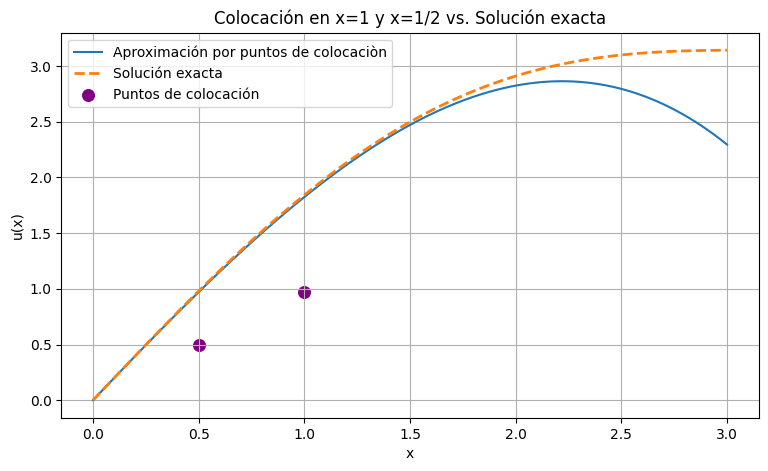

In [108]:
# Solución númerica y analítica

xx=np.linspace(0,3,100)
yy=u_exact_num(xx)
plt.figure(figsize=(9,5))
plt.plot(xx,u_aprprox_fn(xx),label="Aproximación por puntos de colocaciòn")
plt.plot(xx,yy,"--",label="Solución exacta",linewidth=2)  #-* tipo de línea

#Puntos de colocación
plt.scatter([0.5,1],u_aprprox_fn(np.array([0.25,0.5])),
            color="purple",s=70, label="Puntos de colocación")

plt.title("Colocación en x=1 y x=1/2 vs. Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

La gráfica nos proporciona la siguiente información:

### PRECISIÓN DE LA APROXIMACIÓN

* En los puntos de colocación $x=\frac{1}{2}$ y $x=1$: La aproximación es exacta respecto a satisfacer la ecuación diferencial (residual $ε=0$), aunque puede tener un pequeño error respecto a la solución exacta.

* Fuera de los puntos de colocación: El error aumenta gradualmente, especialmente cuando nos alejamos del intervalo $[0,1]$.

Analizaremos el error

In [109]:
# ========================================
# 6. ANÁLISIS DEL ERROR EN LOS PUNTOS DE COLOCACIÓN
# ========================================
print("\n" + "="*60)
print("ANÁLISIS EN PUNTOS DE COLOCACIÓN")
print("="*60)

for p in points:
    exact_val = u_exact_expr.subs(x, p)
    approx_val = u_aprprox.subs(x, p)
    error = abs(float(exact_val - approx_val))

    print(f"\nEn x = {p}:")
    print(f"  Solución exacta: {float(exact_val):.6f}")
    print(f"  Solución aprox:  {float(approx_val):.6f}")
    print(f"  Error absoluto:  {error:.6e}")



ANÁLISIS EN PUNTOS DE COLOCACIÓN

En x = 1/2:
  Solución exacta: 0.979426
  Solución aprox:  0.970588
  Error absoluto:  8.837303e-03

En x = 1:
  Solución exacta: 1.841471
  Solución aprox:  1.823529
  Error absoluto:  1.794157e-02


In [112]:
# Calcular residual numérico
residual_expr = sp.diff(u_aprprox, x, 2) + u_aprprox - x
residual_fn = sp.lambdify(x, residual_expr, "numpy")
residual_vals = residual_fn(xx)
print("\nVerificación: ε(x) debe ser 0 en puntos de colocación")
print(f"ε(1/2) = {residual_expr.subs(x, sp.Rational(1, 2))}")
print(f"ε(1) = {residual_expr.subs(x, 1)}")


Verificación: ε(x) debe ser 0 en puntos de colocación
ε(1/2) = 0
ε(1) = 0


##<span style="color:blue;">Conclusiones:</span>
* En x=0: Ambas soluciones coinciden perfectamente $u(0)=0$.

* Su pendiente inicial: Ambas tienen pendiente 2 en $x=0$.
* La solución exacta es una combinación de funciones sinusoidales y polinómica.

* La aproximación es un simple polinomio cúbico.
* En x=1/2 y x=1, el polinomio está "anclado" para satisfacer la EDO.
Loc cual  crea una especie de interpolación que hace que el polinomio siga la tendencia de la solución real.

* Con solo 2 puntos de colocación y un polinomio de grado 3, la aproximación es buena pero no perfecta.

* El error máximo se observa alrededor de $x=1.5$ (fuera del intervalo entre puntos de colocación).

Para mejorar la aproximación se necesitarían  más puntos de colocación y/o un polinomio de mayor grado.

En conclusión <span style="color:purple;">el método de colocación</span> con polinomio cúbico y 2 puntos proporciona una aproximación aceptable en el intervalo de interés (especialmente cerca de los puntos de colocación), pero no sustituye a la solución exacta cuando se requiere alta precisión.